Import the libraries I need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
plt.style.use('seaborn')
np.random.seed(seed = 1)


# Removing Outliers and Looking for Paterns

Load data

In [2]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
df = pd.read_csv('data_cleaned.csv', index_col=0)


In [17]:
df = df[(df.is_defence == False)]

In [18]:
df

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,...,npxG,xA,xG/90,xA/90,xG+xA/90,npxG/90,npxG+xA/90,is_defence,is_midfield,is_attack
0,Feyenoord Rotterdam,Steven Berghuis,25,Right Winger,Watford,£5.85m,in,5.85,Eredivisie,2017,...,7.0,5.0,0.30,0.21,0.51,0.30,0.51,0,0,1
2,Feyenoord Rotterdam,Sofyan Amrabat,20,Central Midfield,FC Utrecht,£3.60m,in,3.60,Eredivisie,2017,...,0.0,5.0,0.00,0.18,0.18,0.00,0.18,0,1,0
3,ACF Fiorentina,Sofyan Amrabat,23,Central Midfield,Hellas Verona,£9.49m,in,9.49,Serie A,2019,...,1.0,0.0,0.08,0.00,0.08,0.08,0.08,0,1,0
4,Hellas Verona,Sofyan Amrabat,23,Central Midfield,Club Brugge,£3.15m,in,3.15,Serie A,2019,...,1.0,0.0,0.08,0.00,0.08,0.08,0.08,0,1,0
5,Feyenoord Rotterdam,Sam Larsson,24,Left Winger,Heerenveen,£3.60m,in,3.60,Eredivisie,2017,...,9.0,11.0,0.33,0.40,0.73,0.33,0.73,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,Levante UD,Gonzalo Melero,25,Central Midfield,SD Huesca,£3.24m,in,3.24,Primera Division,2019,...,2.5,1.1,0.27,0.07,0.34,0.17,0.24,0,1,0
1604,CA Osasuna,Marc Cardona,23,Centre-Forward,FC Barcelona,£2.25m,in,2.25,Primera Division,2019,...,2.7,0.6,0.41,0.10,0.50,0.41,0.50,0,0,1
1605,CA Osasuna,Robert Ibáñez,26,Right Winger,Getafe,£1.80m,in,1.80,Primera Division,2019,...,0.2,0.0,0.25,0.00,0.25,0.25,0.25,0,0,1
1606,Granada CF,Darwin Machís,26,Left Winger,Udinese Calcio,£2.70m,in,2.70,Primera Division,2019,...,1.3,0.6,0.26,0.12,0.38,0.26,0.38,0,0,1


I created a dataframe of features and one of targets

In [19]:
df_features = df[['age','position','Starts','Minutes','Goals','Assists','Penalty_Goals','Penalty_Attempts',
                  'Yellow_Cards','Red_Cards','Goals/90','Assists/90','Goals+Assists/90','Goals-PKs/90',
                  'Goals+Assists-PKs/90','xG','npxG','xA','xG/90','xA/90','xG+xA/90','npxG/90','npxG+xA/90',
                  'is_defence', 'is_midfield', 'is_attack']]
df_target = df.fee_cleaned

I created a dataframe of just my categorical data

In [20]:
df_categoricals = df_features[['position', 'is_defence', 'is_midfield', 'is_attack']]
df_features.columns

Index(['age', 'position', 'Starts', 'Minutes', 'Goals', 'Assists',
       'Penalty_Goals', 'Penalty_Attempts', 'Yellow_Cards', 'Red_Cards',
       'Goals/90', 'Assists/90', 'Goals+Assists/90', 'Goals-PKs/90',
       'Goals+Assists-PKs/90', 'xG', 'npxG', 'xA', 'xG/90', 'xA/90',
       'xG+xA/90', 'npxG/90', 'npxG+xA/90', 'is_defence', 'is_midfield',
       'is_attack'],
      dtype='object')

I used boxplots to look for outliers and than capped values that I felt were problematic

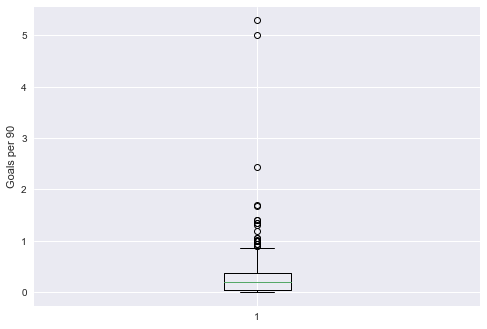

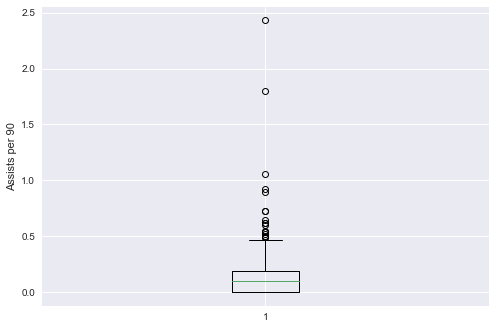

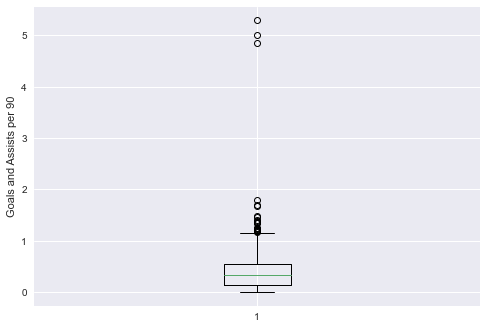

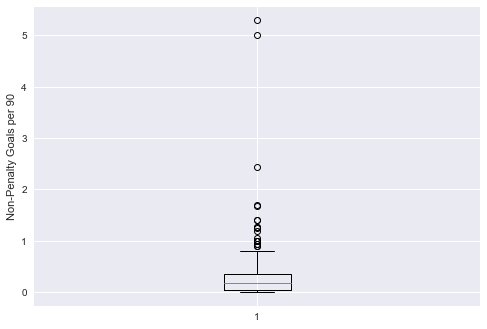

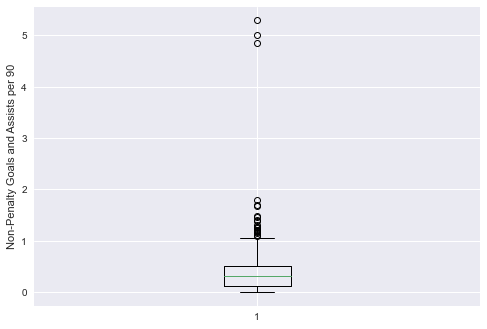

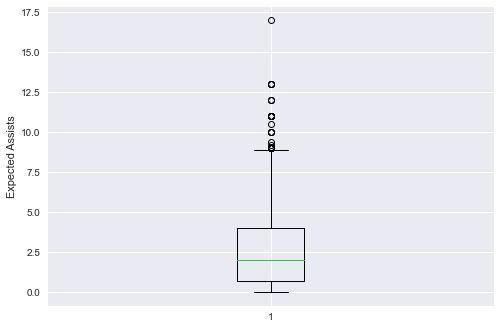

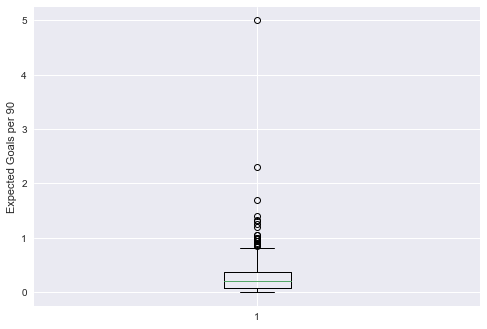

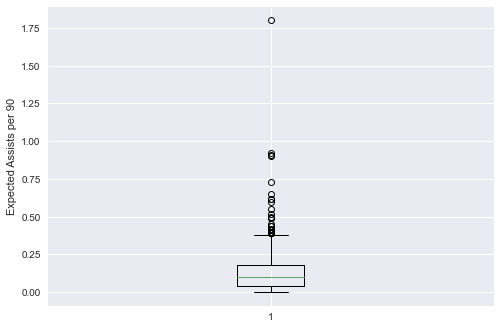

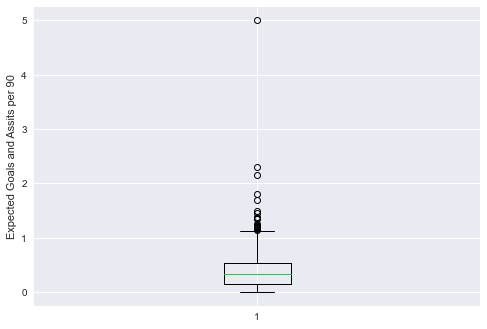

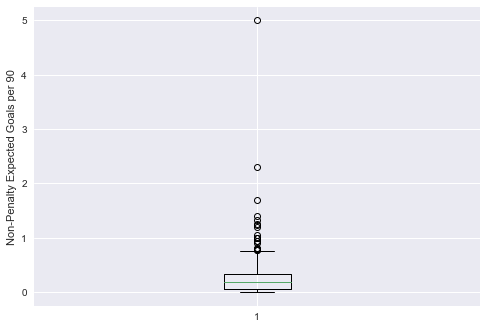

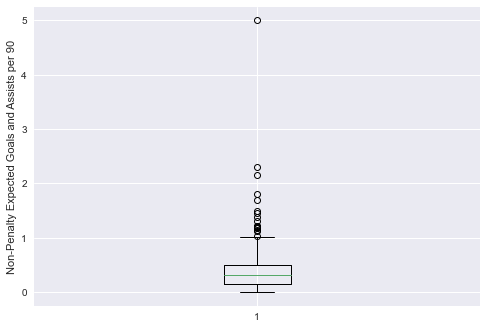

In [21]:
plt.boxplot(df_features['Goals/90'])
plt.ylabel('Goals per 90')
plt.show()
plt.boxplot(df_features['Assists/90'])
plt.ylabel('Assists per 90')
plt.show()
plt.boxplot(df_features['Goals+Assists/90'])
plt.ylabel('Goals and Assists per 90')
plt.show()
plt.boxplot(df_features['Goals-PKs/90'])
plt.ylabel('Non-Penalty Goals per 90')
plt.show()
plt.boxplot(df_features['Goals+Assists-PKs/90'])
plt.ylabel('Non-Penalty Goals and Assists per 90')
plt.show()
plt.boxplot(df_features['xA'])
plt.ylabel('Expected Assists')
plt.show()
plt.boxplot(df_features['xG/90'])
plt.ylabel('Expected Goals per 90')
plt.show()
plt.boxplot(df_features['xA/90'])
plt.ylabel('Expected Assists per 90')
plt.show()
plt.boxplot(df_features['xG+xA/90'])
plt.ylabel('Expected Goals and Assits per 90')
plt.show()
plt.boxplot(df_features['npxG/90'])
plt.ylabel('Non-Penalty Expected Goals per 90')
plt.show()
plt.boxplot(df_features['npxG+xA/90'])
plt.ylabel('Non-Penalty Expected Goals and Assists per 90')
plt.show()

In [22]:
df_features['Goals/90'] = df_features['Goals/90'].apply(lambda x: np.where(x > 2, 2, x))
df_features['Assists/90'] = df_features['Assists/90'].apply(lambda x: np.where(x > 2, 2, x))
df_features['Goals+Assists/90'] = df_features['Goals+Assists/90'].apply(lambda x: np.where(x > 3, 3, x))
df_features['Goals-PKs/90'] = df_features['Goals-PKs/90'].apply(lambda x: np.where(x > 2, 2, x))
df_features['Goals+Assists-PKs/90'] = df_features['Goals+Assists-PKs/90'].apply(lambda x: np.where(x > 3, 3, x))
df_features['xA'] = df_features['xA'].apply(lambda x: np.where(x > 15, 15, x))
df_features['xG/90'] = df_features['xG/90'].apply(lambda x: np.where(x > 2, 2, x))
df_features['xA/90'] = df_features['xA/90'].apply(lambda x: np.where(x > 2, 2, x))
df_features['xG+xA/90'] = df_features['xG+xA/90'].apply(lambda x: np.where(x > 4, 4, x))
df_features['npxG/90'] = df_features['npxG/90'].apply(lambda x: np.where(x > 2, 2, x))
df_features['npxG+xA/90'] = df_features['npxG+xA/90'].apply(lambda x: np.where(x > 3, 3, x))

/Users/ericadsetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ericadsetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ericadsetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

I look at the distributions of all my features

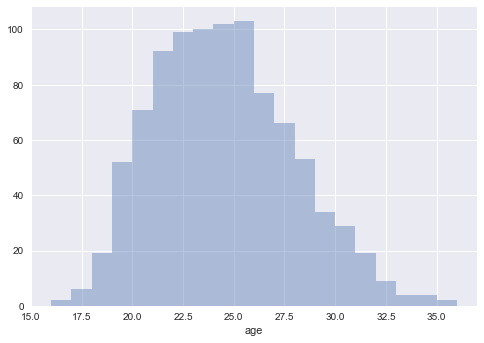

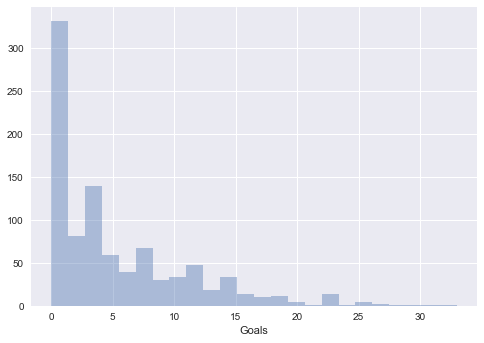

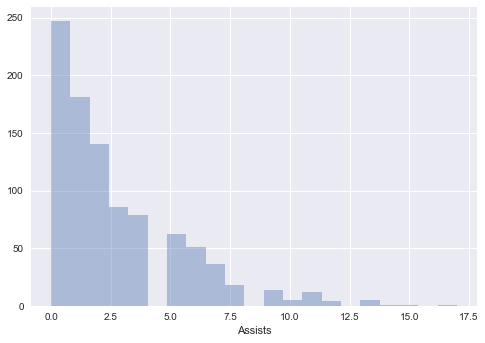

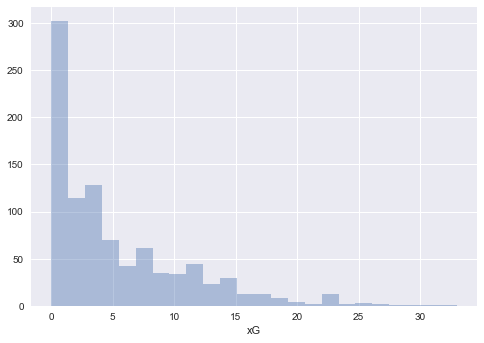

In [23]:
sns.distplot(df_features['age'], kde = False)
plt.show()
sns.distplot(df_features['Goals'], kde = False)
plt.show()
sns.distplot(df_features['Assists'], kde = False)
plt.show()
sns.distplot(df_features['xG'], kde = False)
plt.show()

I plot my features against my target to see if there is a clear pattern for any of them (There isn't)

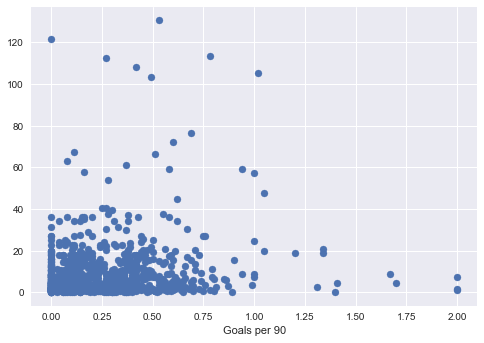

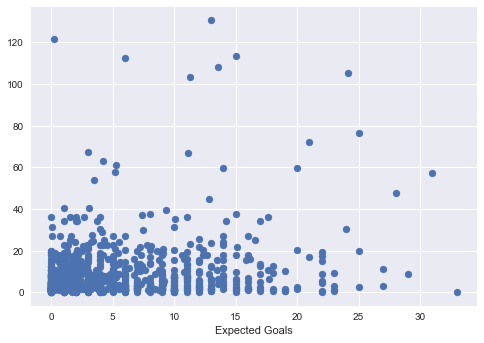

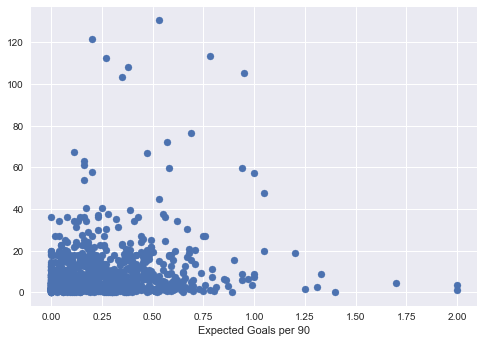

In [24]:
plt.scatter(df_features['Goals/90'], df_target)
plt.xlabel('Goals per 90')
plt.show()
plt.scatter(df_features['xG'], df_target)
plt.xlabel('Expected Goals')
plt.show()
plt.scatter(df_features['xG/90'], df_target)
plt.xlabel('Expected Goals per 90')
plt.show()

In [25]:
df_dummies = pd.get_dummies(df_features.position)
df_features = pd.concat([df_features, df_dummies], axis = 1)
df_features.drop(['position'], axis = 1, inplace = True)

# Modeling and Evaluation
Perform my train test split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, random_state = 42)


Scaled my data

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Created a dummy regressor to compare my models against

In [28]:
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
y_train_preds = dummy.predict(X_train)
mean_absolute_percentage_error(y_train, y_train_preds)


502.07198256393417

In [29]:
y_preds = dummy.predict(X_test)
mean_absolute_percentage_error(y_test, y_preds)


537.4593851519945

Created a linear regression model

In [30]:
line = LinearRegression(n_jobs = -1)
line.fit(X_train, y_train)
y_train_preds = line.predict(X_train)
mean_absolute_percentage_error(y_train, y_train_preds)


410.7574243613764

In [31]:
y_preds = line.predict(X_test)
mean_absolute_percentage_error(y_test, y_preds)


482.1630122319835

Sorted features by coeffecients

In [32]:
sorted(list(zip(line.coef_, df_features.columns)))


[(-93.09074074654002, 'Goals+Assists/90'),
 (-70.05699096829909, 'xG'),
 (-49.802343280234524, 'Goals-PKs/90'),
 (-14.904657924264976, 'npxG/90'),
 (-6.612672072756454, 'Starts'),
 (-4.191829223508069, 'xG+xA/90'),
 (-2.562026306583552, 'xA'),
 (-1.6144171169913801, 'Centre-Forward'),
 (-0.7615167740281966, 'Left Midfield'),
 (-0.7160272801454426, 'Yellow_Cards'),
 (-0.5145984179895757, 'Attacking Midfield'),
 (-0.49503200397349006, 'Right Midfield'),
 (-0.4491713795860314, 'age'),
 (-0.3622144754693118, 'Red_Cards'),
 (-0.17784099590963834, 'xA/90'),
 (-0.14279918172913886, 'is_attack'),
 (-1.3038459201197838e-12, 'is_defence'),
 (0.11471795160933078, 'Right Winger'),
 (0.14279918172826483, 'is_midfield'),
 (0.2490717652812027, 'Central Midfield'),
 (0.8381271197018875, 'Defensive Midfield'),
 (0.9466910925016176, 'Left Winger'),
 (1.843733585467719, 'Assists/90'),
 (2.2769584604242983, 'Second Striker'),
 (2.562175234651442, 'Penalty_Attempts'),
 (5.498983903444233, 'Assists'),
 (5.5

Created a ridge model than used grid search to find optimal parameters

In [33]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_train_preds = ridge.predict(X_train)
mean_absolute_percentage_error(y_train, y_train_preds)


417.17460171293794

In [34]:
y_preds = ridge.predict(X_test)
mean_absolute_percentage_error(y_test, y_preds)


424.3293280241157

In [35]:
param_grid = {'alpha': [.01,.1,.5,1,5,10,15, 20, 25, 30, 100, 1000, 1500, 2500]}
ridge_CV = GridSearchCV(ridge, param_grid, scoring = 'neg_root_mean_squared_error', n_jobs = -1, verbose = 1)
ridge_CV.fit(X_train, y_train)
print(ridge_CV.best_score_)
print(ridge_CV.best_params_)
y_preds = ridge_CV.predict(X_test)
mean_absolute_percentage_error(y_test, y_preds)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


-13.285182809380458
{'alpha': 1000}


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.2s finished


427.37558050401975

Plotted Coeffecients

In [36]:
sorted(list(zip(ridge.coef_, df_features.columns)))


[(-14.658915193042505, 'xG'),
 (-5.2485866635753196, 'Starts'),
 (-3.991137700289239, 'Goals+Assists/90'),
 (-3.4049217706109918, 'xA'),
 (-2.569938593371974, 'Goals+Assists-PKs/90'),
 (-1.8615359019350477, 'xG+xA/90'),
 (-1.5687155995814874, 'Centre-Forward'),
 (-0.7597902550321537, 'Left Midfield'),
 (-0.7538653902846043, 'Goals-PKs/90'),
 (-0.5834993055197826, 'Yellow_Cards'),
 (-0.5779908411141699, 'Attacking Midfield'),
 (-0.48894734510567583, 'Right Midfield'),
 (-0.4416726803211276, 'age'),
 (-0.2772125395727123, 'Red_Cards'),
 (-0.1149759658256944, 'is_attack'),
 (0.0, 'is_defence'),
 (0.09784153392107955, 'Right Winger'),
 (0.11497596582569987, 'is_midfield'),
 (0.27913610448937753, 'Central Midfield'),
 (0.4287914390079973, 'Penalty_Attempts'),
 (0.4678954374441513, 'xG/90'),
 (0.806088645611452, 'Defensive Midfield'),
 (0.8849227617537156, 'xA/90'),
 (0.9256227912043682, 'Left Winger'),
 (1.0985133854376563, 'npxG/90'),
 (1.6172688455421413, 'Assists/90'),
 (1.72551278357741

Created Lasso model than tuned hyper parameters with grid search than looked at coefficients

In [37]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_train_preds = lasso.predict(X_train)
mean_absolute_percentage_error(y_train, y_train_preds)


455.03335430060235

In [38]:
y_preds = lasso.predict(X_test)
mean_absolute_percentage_error(y_test, y_preds)


441.36695594068885

In [39]:
param_grid = {'alpha': [.01,.1,.5,1,5,10]}
lasso_CV = GridSearchCV(lasso, param_grid, scoring = 'neg_root_mean_squared_error', n_jobs = -1, verbose = 1)
lasso_CV.fit(X_train, y_train)
print(lasso_CV.best_score_)
print(lasso_CV.best_params_)
y_preds = lasso_CV.predict(X_test)
mean_absolute_percentage_error(y_test, y_preds)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
-13.372677089295768
{'alpha': 1}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


441.36695594068885

In [40]:
sorted(list(zip(lasso.coef_, df_features.columns)))


[(0.0, 'Assists/90'),
 (-0.0, 'Attacking Midfield'),
 (-0.0, 'Central Midfield'),
 (-0.0, 'Centre-Forward'),
 (0.0, 'Defensive Midfield'),
 (0.0, 'Goals+Assists-PKs/90'),
 (0.0, 'Goals-PKs/90'),
 (0.0, 'Goals/90'),
 (-0.0, 'Left Midfield'),
 (-0.0, 'Minutes'),
 (0.0, 'Penalty_Attempts'),
 (0.0, 'Penalty_Goals'),
 (-0.0, 'Red_Cards'),
 (-0.0, 'Right Midfield'),
 (0.0, 'Right Winger'),
 (-0.0, 'Starts'),
 (-0.0, 'Yellow_Cards'),
 (-0.0, 'age'),
 (0.0, 'is_attack'),
 (0.0, 'is_defence'),
 (-0.0, 'is_midfield'),
 (0.0, 'npxG'),
 (0.0, 'npxG+xA/90'),
 (0.0, 'npxG/90'),
 (0.0, 'xA'),
 (0.0, 'xA/90'),
 (0.0, 'xG'),
 (0.0, 'xG+xA/90'),
 (0.0, 'xG/90'),
 (0.3477347571594671, 'Left Winger'),
 (0.3478167860219097, 'Goals+Assists/90'),
 (1.3425702608549015, 'Goals'),
 (1.4994396184086338, 'Second Striker'),
 (2.200376220011542, 'Assists')]

Did the same thing with support vector regressor

In [41]:
svr = SVR()
svr.fit(X_train, y_train)
y_train_preds = svr.predict(X_train)
mean_absolute_percentage_error(y_train, y_train_preds)


201.70907641943984

In [42]:
y_preds = svr.predict(X_test)
mean_absolute_percentage_error(y_test, y_preds)


230.93609510487818

In [43]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'degree': [.5,1,2,3], 'C': [1,5,10,25,50], 'epsilon': [.1, .5, 1, 5, 10]}
svr_CV = GridSearchCV(svr, param_grid, scoring = 'neg_root_mean_squared_error', n_jobs = -1, verbose = 1)
svr_CV.fit(X_train, y_train)
print(svr_CV.best_score_)
print(svr_CV.best_params_)
y_preds = svr_CV.predict(X_test)
mean_absolute_percentage_error(y_test, y_preds)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 1852 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 1985 out of 2000 | elapsed:   24.9s remaining:    0.2s


-13.246590474788258
{'C': 25, 'degree': 0.5, 'epsilon': 5, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   25.3s finished


450.32938070838486

Created than tuned a decision tree regressor

In [44]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_train_preds = tree.predict(X_train)
mean_absolute_percentage_error(y_train, y_train_preds)


0.6465846663801744

In [45]:
y_preds = tree.predict(X_test)
mean_absolute_percentage_error(y_test, y_preds)


394.31031119539506

In [46]:
param_grid = {'max_depth': [None, 1, 2, 5, 10], 'min_samples_split': [2,4,6,8,10],
              'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}
tree_CV = GridSearchCV(tree, param_grid, scoring = 'neg_root_mean_squared_error', n_jobs = -1, verbose = 1)
tree_CV.fit(X_train, y_train)
print(tree_CV.best_score_)
print(tree_CV.best_params_)
y_preds = tree_CV.predict(X_test)
mean_absolute_percentage_error(y_test, y_preds)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


-13.647896224890157
{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}


[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:    1.2s finished


493.3419998138779

Created and tuned a random forest model. This one performed best.

In [47]:
rf = RandomForestRegressor(n_jobs = -1, random_state = 1)
rf.fit(X_train, y_train)
y_train_preds = rf.predict(X_train)
mean_absolute_percentage_error(y_train, y_train_preds)


155.54414926559022

In [48]:
y_preds = rf.predict(X_test)
mean_absolute_percentage_error(y_test, y_preds)


465.4186393831302

In [49]:
param_grid = {'n_estimators': [5, 10, 25,50,100,500], 'max_depth': [None, 1, 2, 3, 4, 5, 10],
              'min_samples_split': [2,4,6,8,10,15,20]}
rf_CV = GridSearchCV(rf, param_grid, scoring = 'neg_root_mean_squared_error', n_jobs = -1, verbose = 1)
rf_CV.fit(X_train, y_train)
print(rf_CV.best_score_)
print(rf_CV.best_params_)
y_preds = rf_CV.predict(X_test)
mean_absolute_percentage_error(y_test, y_preds)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1470 out of 1470 | elapsed:  2.0min finished


-13.217684343910197
{'max_depth': 2, 'min_samples_split': 4, 'n_estimators': 10}


497.2713928668213

In [50]:
y_preds = rf_CV.predict(X_test)

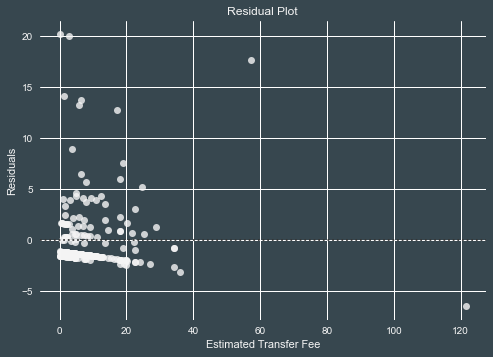

In [51]:
fig = plt.figure(facecolor = '#37474f')
ax = sns.residplot(y_test, y_preds, color = '#f5f5f5')
plt.title('Residual Plot', color = '#f5f5f5')
plt.xlabel('Estimated Transfer Fee', color = '#f5f5f5')
plt.ylabel('Residuals', color = '#f5f5f5')
plt.xticks(color = '#f5f5f5')
plt.yticks(color = '#f5f5f5')
ax.set_facecolor('#37474f')

Examine feature importances

In [52]:
sorted(zip(rf_CV.best_estimator_.feature_importances_, df_features.columns))

[(0.0, 'Attacking Midfield'),
 (0.0, 'Central Midfield'),
 (0.0, 'Centre-Forward'),
 (0.0, 'Defensive Midfield'),
 (0.0, 'Goals/90'),
 (0.0, 'Left Midfield'),
 (0.0, 'Minutes'),
 (0.0, 'Penalty_Goals'),
 (0.0, 'Red_Cards'),
 (0.0, 'Right Midfield'),
 (0.0, 'Right Winger'),
 (0.0, 'Starts'),
 (0.0, 'Yellow_Cards'),
 (0.0, 'age'),
 (0.0, 'is_attack'),
 (0.0, 'is_defence'),
 (0.0, 'is_midfield'),
 (0.0, 'npxG'),
 (0.0, 'npxG/90'),
 (0.0, 'xA'),
 (0.0, 'xA/90'),
 (0.0, 'xG+xA/90'),
 (0.02355522993812218, 'Penalty_Attempts'),
 (0.03178953161103123, 'Assists/90'),
 (0.03670347720810426, 'xG'),
 (0.04733116626076789, 'xG/90'),
 (0.047567712261028926, 'npxG+xA/90'),
 (0.04998470263765368, 'Left Winger'),
 (0.05121265098895586, 'Goals-PKs/90'),
 (0.09059930088437756, 'Assists'),
 (0.09900715199153949, 'Goals'),
 (0.14884766189855134, 'Goals+Assists/90'),
 (0.15784704870035887, 'Goals+Assists-PKs/90'),
 (0.21555436561950886, 'Second Striker')]

Lastly I used an xgboost model and tuned hyperparametes.

In [53]:
xg = xgb.XGBRegressor(n_jobs = -1, objective = 'reg:squarederror', eval_metric = 'rmse')
xg.fit(X_train, y_train)
y_train_preds = xg.predict(X_train)
mean_absolute_percentage_error(y_train, y_train_preds)


17.330715587631875

In [54]:
y_preds = xg.predict(X_test)
mean_absolute_percentage_error(y_test, y_preds)


440.91790801513054

In [55]:
sorted(zip(xg.feature_importances_, df_features.columns))


[(0.0, 'is_attack'),
 (0.0, 'is_defence'),
 (0.0021185824, 'Red_Cards'),
 (0.002569855, 'Penalty_Goals'),
 (0.0025905226, 'Right Midfield'),
 (0.0033516407, 'Attacking Midfield'),
 (0.0049383515, 'Left Midfield'),
 (0.00649282, 'Right Winger'),
 (0.006546596, 'age'),
 (0.006835668, 'Defensive Midfield'),
 (0.0074936515, 'Minutes'),
 (0.008056607, 'Goals+Assists/90'),
 (0.0085355835, 'Centre-Forward'),
 (0.008676287, 'npxG/90'),
 (0.008801823, 'Penalty_Attempts'),
 (0.009188242, 'Goals-PKs/90'),
 (0.01019836, 'Central Midfield'),
 (0.012948678, 'xG+xA/90'),
 (0.013767294, 'npxG'),
 (0.013794201, 'npxG+xA/90'),
 (0.013934068, 'xA/90'),
 (0.014891361, 'Goals/90'),
 (0.014955784, 'Starts'),
 (0.017703861, 'is_midfield'),
 (0.01995111, 'Assists'),
 (0.020831924, 'Yellow_Cards'),
 (0.028621636, 'xG/90'),
 (0.03495492, 'Assists/90'),
 (0.038931377, 'xG'),
 (0.043128848, 'Goals'),
 (0.057816684, 'xA'),
 (0.09163029, 'Goals+Assists-PKs/90'),
 (0.21246949, 'Second Striker'),
 (0.25327384, 'Left 

In [56]:
param_grid = {'eta': [1e-100, 1e-50, 1e-20, 1e-10,.000000001, .00000001],
              'max_depth': [1,2,3],
              'min_child_weight': [15,20, 25, 30, 50, 75,  100]}
xg_CV = GridSearchCV(xg, param_grid, scoring = 'neg_root_mean_squared_error', n_jobs = -1, verbose = 1)
xg_CV.fit(X_train, y_train)
print(xg_CV.best_score_)
print(xg_CV.best_params_)
y_preds = xg_CV.predict(X_test)
mean_absolute_percentage_error(y_test, y_preds)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 585 tasks      | elapsed:    5.6s


-12.993477790729381
{'eta': 1e-20, 'max_depth': 1, 'min_child_weight': 50}


[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:    6.1s finished


430.98817207962605